## Part 2. Introduction to Scipy

[Scipy](http://www.scipy.org/) is a collection of Python tools for maths, science and engineering; it provides libraries for numerical computation (including on vectors and arrays, which will be useful for the rest of the Perception & Multimedia Computing module) and for visualisation (plotting graphs, which will be particularly useful in understanding phenomena related to sound, which are otherwise hard to conceptualise).  We'll be using the `numpy` package for arrays (imported as np) and `matplotlib`, which in particular includes the `plot` command with inline graphics.

Conveniently, the configuration files you installed from the lab bundle have already told your Jupyter Notebook to use these packages, so it's time to get started!

**Run the code examples below to get started with Scipy:**

Python allows us to do *vectorised computation*, which means that we can perform operations on lists of variables (or arrays) instead of just one element at a time. For instance, note how the following code allows you to add elements of two lists, without using a for-loop:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci


a = [1,2,3] # a is just a list of numbers. You can't do fancy vectorised stuff directly with lists alone
b = np.array([1,2,3]) # b is an array. You make an array by giving a list to an array constructor function
c = 10 * b #now c is 10, 20, 30: Multiplication of each element without an array!

a, b, c #you can declare and print like this instead of going print(a, b, c)

([1, 2, 3], array([1, 2, 3]), array([10, 20, 30]))

In [ ]:
d = np.array([1,2,3])
e = np.array([100, 200, 300])
d + e #We can also do arithmetic operations on two arrays, such as adding each element

array([101, 202, 303])

With `matplotlib` we can plot simple line graphs of lists or arrays using `plt.plot(x,y)`:

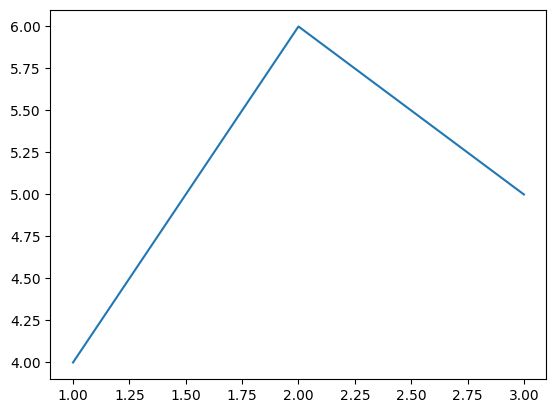

In [ ]:
#plotting (x,y) or better said ([x1, x2, x3],[y1, y2, y3])
plt.plot([1,2,3],[4,6,5]) #[1,2,3] are x values of 3 points, [4,6,5] are y values of the same 3 points

Multiple `plot` commands in one cell give superposed graphs:

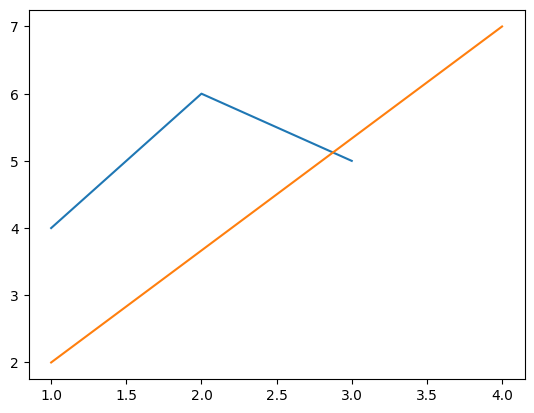

In [ ]:
plt.plot([1,2,3],[4,6,5])
plt.plot([1,4],[2,7])

Other commands can be used to give the graph a more polished finish:

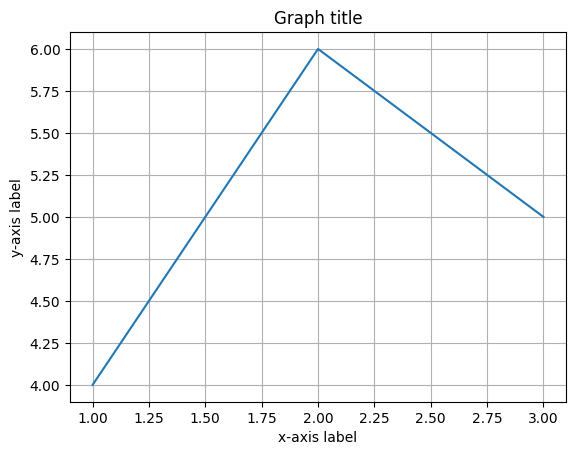

In [ ]:
plt.plot([1,2,3],[4,6,5])
plt.xlabel("x-axis label") #name x axis label
plt.ylabel("y-axis label") #name y axis
plt.title("Graph title") #title for the graph
plt.grid(True) #activate the grid (off by default)

For now, we won’t need much of the complicated functionality of `plot`, which can be used to produce production-quality graphics; instead, we’ll concentrate on using it to give quick visualisations of numerical data, which we’ll be using to represent signals.  For example, we can visualise a sine wave:

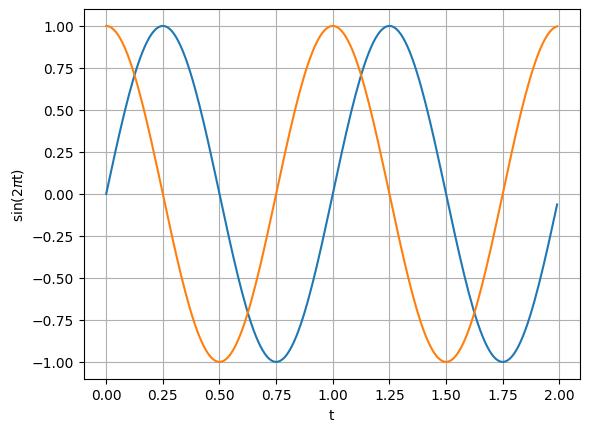

In [ ]:
# declaring PI here so I don't need to call sci.pi every frikkin time
pi = np.pi
sin = np.sin
cos = np.cos

# arange(start, end, step) returns an array with elements going from start to end by step.
t = np.arange(0, 2, 0.01)

# sin here takes the sine of *each* array element of its argument.  The multiplications are also vectorised.
# in other words, after this command, s[i] will be equal to sin(2*pi*t[i]) for each index i
s = sin(2*pi*t)
c = cos(2*pi*t)

plt.plot(t,s) #puts t on the x-axis and s on the y-axis
plt.plot(t,c) #again, but plotting cos instead
plt.xlabel("t")
plt.ylabel("sin(2$\pi$t)")
plt.grid(True)

## Part 3. Introduction to creating and visualising sound signals

### Generating a signal: A step-by-step explanation

We'll be working with standard (CD-quality) audio, so let's define a symbolic constant `samplerate` to store our sample rate of 44.1kHz. Let's also make a `duration` variable to store the duration of our new sound, in seconds.

In [ ]:
samplerate = 44100 # Creates a new variable. Notice no need to declare samplerate or its type!
duration = 3 # Creates another new variable

Now let's make an array to hold all relevant time values, one every $\frac{1}{44100}$ seconds, from 0 to 3. <b>Press Shift+Enter on the cell below to execute the code creating this array:</b>

In [ ]:
# the function np.arange will give us an array of
# values starting at 0 and going up to (but not including) duration, with a spacing of 1/samplerate
t = np.arange(0, duration, 1/samplerate)
t # this will print a summary of our array t to the screen

array([0.00000000e+00, 2.26757370e-05, 4.53514739e-05, ...,
       2.99993197e+00, 2.99995465e+00, 2.99997732e+00])

At this point we, can optionally examine `t` using functions like `np.size(t)` or `plt.plot(t)` or `np.max(t)`. (np.* functions are from the numpy library.) Play with these functions below:

132300
2.9999773242630385


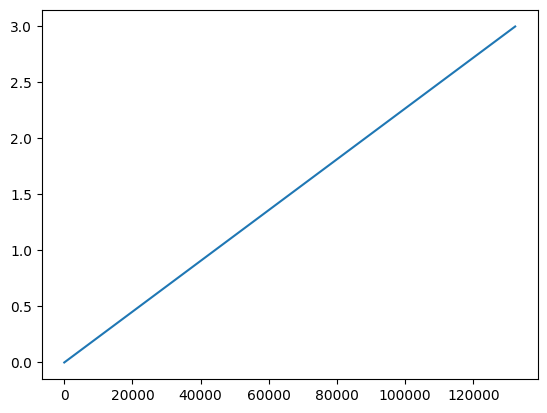

In [ ]:
print(np.size(t)) #the total number of samples will obviously be 44100*3=132300
print(np.max(t))
plt.plot(t)

Then, using the general expression for a sinusoidal signal $$x = A\times\sin{\left(2\pi f t + \phi\right)}$$
we can generate a 440Hz sinewave with amplitude one half by using the `sin` built-in function, to compute $$x_{440} = \frac{1}{2}\times\sin{\left(2\times\pi\times 440\times t\right)}$$

The following code will result in `x440` being an array the same length as `t`, and each element of `x440` will be the value of the sinusoid at the time corresponding to the same element of `t`

https://en.wikipedia.org/wiki/Sine_wave

<b>Press Shift+Enter to execute:</b>

In [ ]:
# a sine wave at 440Hz, with amplitude 0.5
x440 = 0.5*sin(2*pi*440*t)
x440 #this will print out a summary of the variable x440

array([ 0.        ,  0.03132416,  0.06252526, ..., -0.09348072,
       -0.06252526, -0.03132416])

### Visualising and playing

Now $x_{440}$ represents our sampled signal.  We can plot it using the `plot` command, and play it by using the `play` utility functions from the lab bundle. Executing the following cells *should* give a sinusoidal graph, and an HTML control allowing you to play 3 seconds' worth of 440Hz ‘concert A’ sine wave.

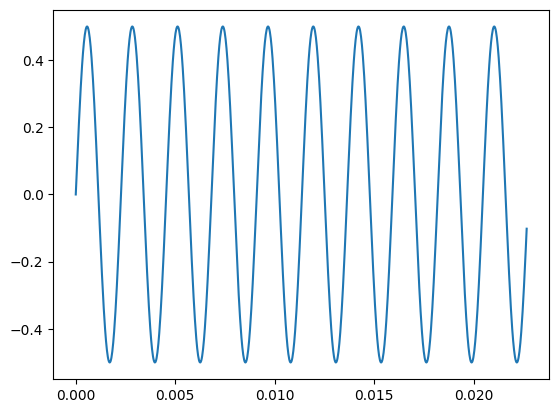

In [ ]:
#plot with the first 1000 elements of t on the x-axis, and the first 1000 elements of x440 on the y-axis
plt.plot(t[0:1000], x440[0:1000])

In [ ]:
import IPython.display as ipd #found this solution on a stanford MIR colab notebook, check it out
# ipd.Audio(x, rate=sr) load a NumPy array
ipd.Audio(x440, rate=samplerate)

## Part 4. Having fun with sound

Explore the use of sines in the following tasks, using plotting and the `play()` function:
    
i. Change the frequency and amplitude of the sine wave and listen to how it changes.

* What is the lowest-frequency sine wave you can hear? The highest?

* Can you find two sines of the same gain but different frequencies, where one clearly sounds louder than the other? (Recall the Fletcher Munson curves from last term)

** Tip: Remember that the "rule of thumb" is that humans can hear between 20Hz and 20,000Hz. Keep the amplitude between 0 and 1, unless you like danger.






In [ ]:
# x440 = 0.5*sin(2*pi*440*t) was the OG expression
#creating a second signal s2 with different aplitude and frequency

amp2 = 0.4 # amplitude
freq2 = 440 # frequency

s2 = amp2*sin(2*pi*freq2*t)

#play the new frequency
ipd.Audio(s2, rate=samplerate)

ii. Add two or three sine waves together to play them at the same time (like a chord). For example, if `s1`, `s2`, and `s3` are all sines at different frequencies, you can add them together like `s4 = s1 + s2 + s3`.

* Tip #1: Make sure that the overall gain of your wave still stays less than 1. For example, if `s1`, `s2`, and `s3` all range from -1 to +1, then you might want to adjust the equation above to be `s4 = 0.33*(s1 + s2 + s3)`
* Tip #2: Try starting with 440Hz, 277.18Hz, and 329.63Hz.
* Can you make other chords that sound musical? (You might want to use http://www.sengpielaudio.com/calculator-notenames.htm to look up frequencies that correspond to different notes of the Western scale)
* What happens when you add frequences that are very close together (e.g., 440Hz and 441Hz)?
* What happens when you add frequencies that are all multiples of a single "fundamental" frequency? (e.g., `440`, `2*440`, `3*440`, `4*400`, ...)



In [ ]:
amp3 = 0.5 # lowering the average amplitude so the end result will be <= 1
freq3 = 441
s3 = amp3*sin(2*pi*freq3*t)
#play the new sound, some beatings as the frequencies are close together
sigbeats = s2 + s3
ipd.Audio(sigbeats, rate=samplerate)
#after this, plot the signal to visually see the beats:

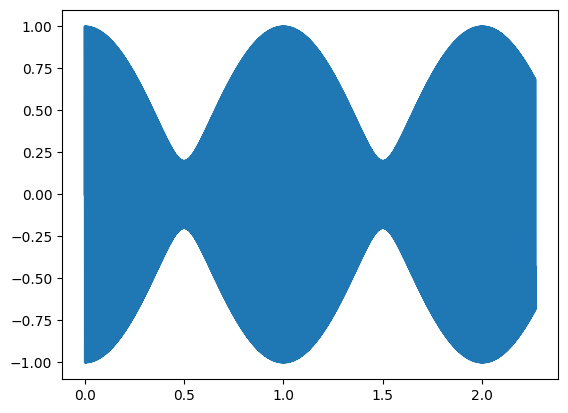

In [ ]:
#plot with the first 1000 elements of t on the x-axis, and the first 100000 elements of x440 on the y-axis
plt.plot(t[0:100000], sigbeats[0:100000])
# by expanding the range of the plot on the x axis it is possible to see the beats (phase cancellation!)

iii. Play one sine wave immediately after another by concatenating their arrays. If `s2` and `s3` are sine waves, you can concatenate them using the syntax `s4 = np.concatenate([s2, s3])`.

In [ ]:
s4 = np.concatenate([s2, s3])
ipd.Audio(s4, rate=samplerate)

iv. Try creating a simple melody and/or chord sequence.

If you make sounds you like, you can save them to a .WAV file using the syntax `wavWrite("myFilename.wav", data)` where `data` is the array holding your sound.

In [ ]:
# here I will import librosa so I can write these wav files to disk
import soundfile as sf
sf.write('stereo_file.wav', sigbeats, samplerate, subtype='PCM_24')
# the file will be written in the 'sample_data" folder!